#####LOGISTIC REGRESSION#########

1. Try different thresholds for computing predictions. By default it is 0.5. Use predict_proba function to compute probabilities and then try custom thresholds and see their impact on Accuracy, Precision and Recall

2. Do the same analysis for other columns

3. Fit a Logistic Regression Model on all features. Remember to preprocess data(eg. normalization and one hot encoding)

4. Plot ROC Curves for each model


######CLUSTERING#########
1. Repeat the above exercise for different values of k
 - How do the inertia and silhouette scores change?
 - What if you don't scale your features?
 - Is there a 'right' k? Why or why not?


2. Repeat the following exercise for food nutrients dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

glass = pd.read_csv('glass.csv')

#create household column, seeing if row is household glass (1) or not (0) - types 5,6,7 are household glass
glass['household'] = glass.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})


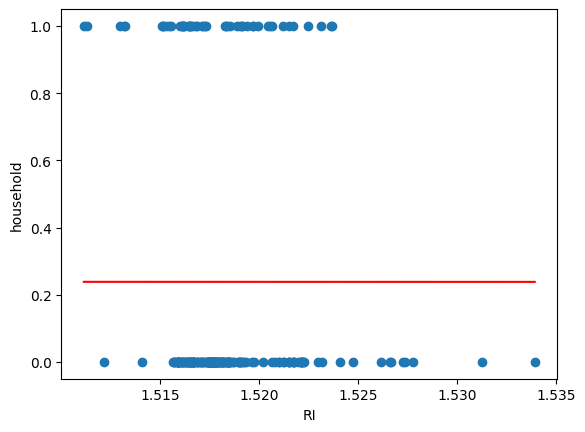

/var/folders/3r/gxtw2cvj59sdnn7pp03j5hrw0000gn/T/ipykernel_3994/796227465.py:40: RuntimeWarning: invalid value encountered in scalar divide
  Precision = (cm[1,1])/ (np.sum(cm[: , 1]))
/var/folders/3r/gxtw2cvj59sdnn7pp03j5hrw0000gn/T/ipykernel_3994/796227465.py:40: RuntimeWarning: invalid value encountered in scalar divide
  Precision = (cm[1,1])/ (np.sum(cm[: , 1]))
/var/folders/3r/gxtw2cvj59sdnn7pp03j5hrw0000gn/T/ipykernel_3994/796227465.py:40: RuntimeWarning: invalid value encountered in scalar divide
  Precision = (cm[1,1])/ (np.sum(cm[: , 1]))
/var/folders/3r/gxtw2cvj59sdnn7pp03j5hrw0000gn/T/ipykernel_3994/796227465.py:40: RuntimeWarning: invalid value encountered in scalar divide
  Precision = (cm[1,1])/ (np.sum(cm[: , 1]))


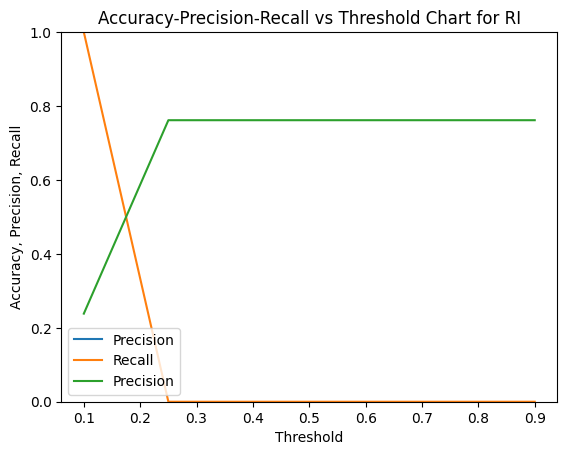

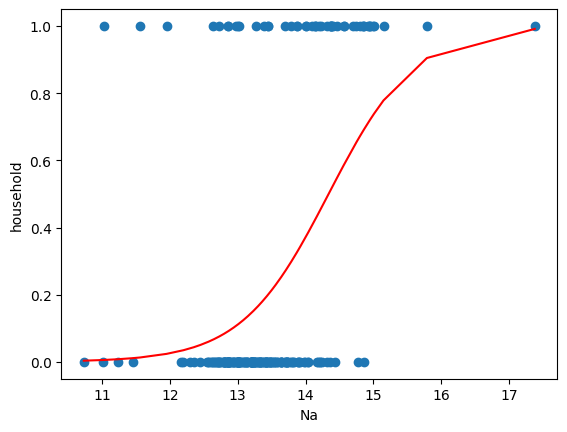

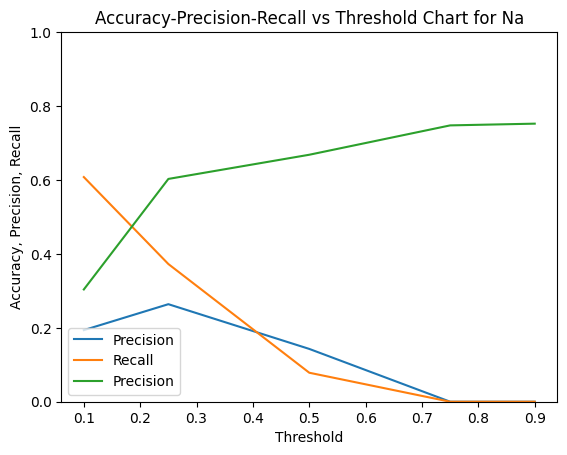

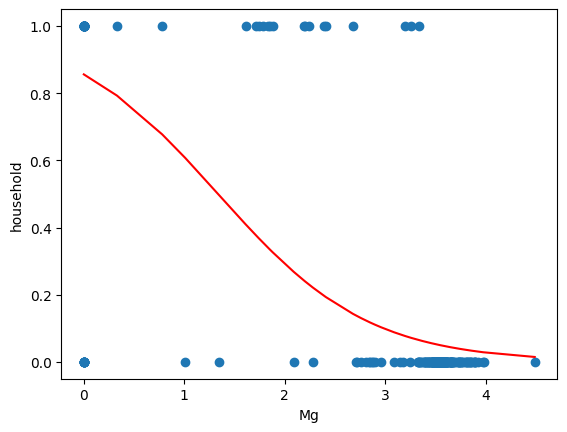

/var/folders/3r/gxtw2cvj59sdnn7pp03j5hrw0000gn/T/ipykernel_3994/796227465.py:40: RuntimeWarning: invalid value encountered in scalar divide
  Precision = (cm[1,1])/ (np.sum(cm[: , 1]))


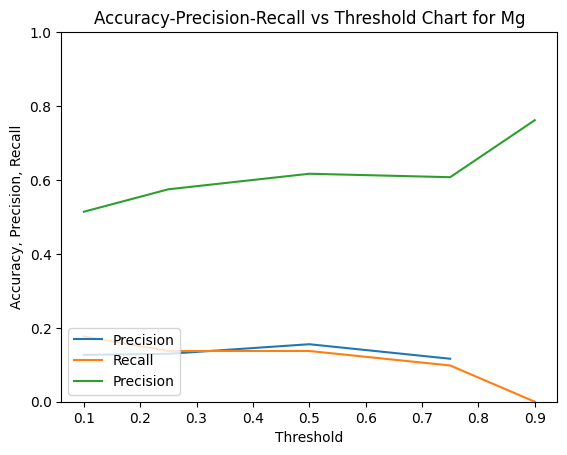

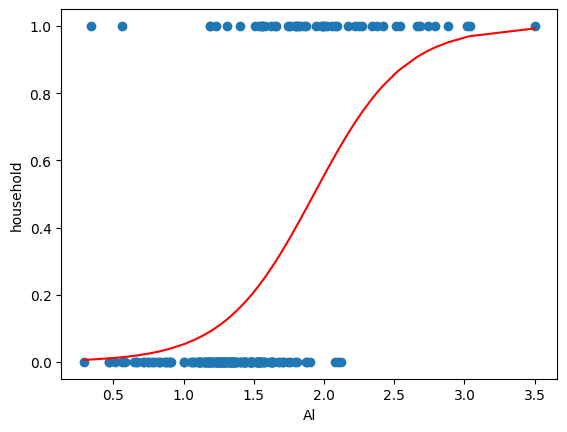

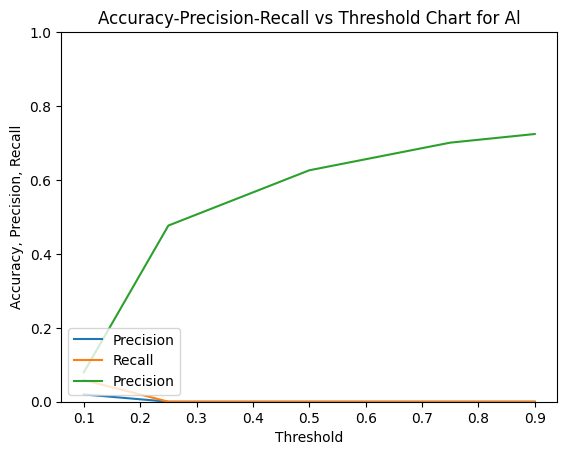

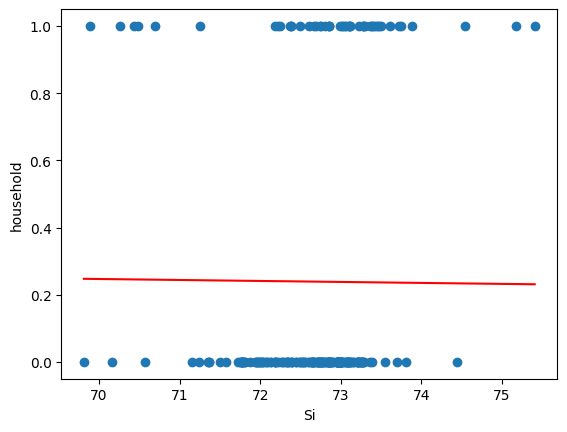

/var/folders/3r/gxtw2cvj59sdnn7pp03j5hrw0000gn/T/ipykernel_3994/796227465.py:40: RuntimeWarning: invalid value encountered in scalar divide
  Precision = (cm[1,1])/ (np.sum(cm[: , 1]))
/var/folders/3r/gxtw2cvj59sdnn7pp03j5hrw0000gn/T/ipykernel_3994/796227465.py:40: RuntimeWarning: invalid value encountered in scalar divide
  Precision = (cm[1,1])/ (np.sum(cm[: , 1]))
/var/folders/3r/gxtw2cvj59sdnn7pp03j5hrw0000gn/T/ipykernel_3994/796227465.py:40: RuntimeWarning: invalid value encountered in scalar divide
  Precision = (cm[1,1])/ (np.sum(cm[: , 1]))
/var/folders/3r/gxtw2cvj59sdnn7pp03j5hrw0000gn/T/ipykernel_3994/796227465.py:40: RuntimeWarning: invalid value encountered in scalar divide
  Precision = (cm[1,1])/ (np.sum(cm[: , 1]))


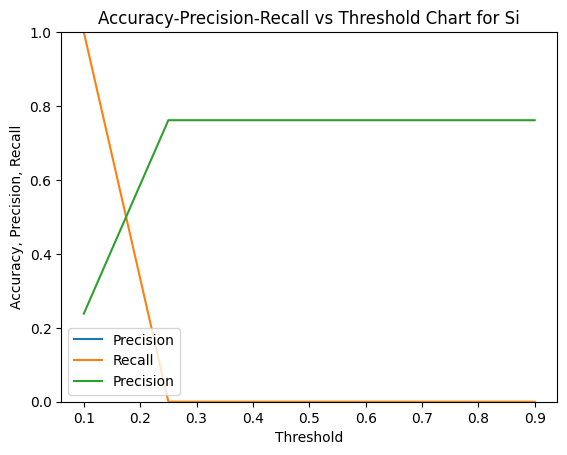

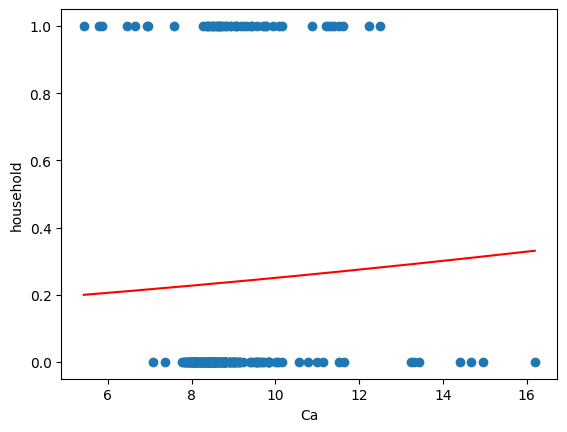

/var/folders/3r/gxtw2cvj59sdnn7pp03j5hrw0000gn/T/ipykernel_3994/796227465.py:40: RuntimeWarning: invalid value encountered in scalar divide
  Precision = (cm[1,1])/ (np.sum(cm[: , 1]))
/var/folders/3r/gxtw2cvj59sdnn7pp03j5hrw0000gn/T/ipykernel_3994/796227465.py:40: RuntimeWarning: invalid value encountered in scalar divide
  Precision = (cm[1,1])/ (np.sum(cm[: , 1]))
/var/folders/3r/gxtw2cvj59sdnn7pp03j5hrw0000gn/T/ipykernel_3994/796227465.py:40: RuntimeWarning: invalid value encountered in scalar divide
  Precision = (cm[1,1])/ (np.sum(cm[: , 1]))


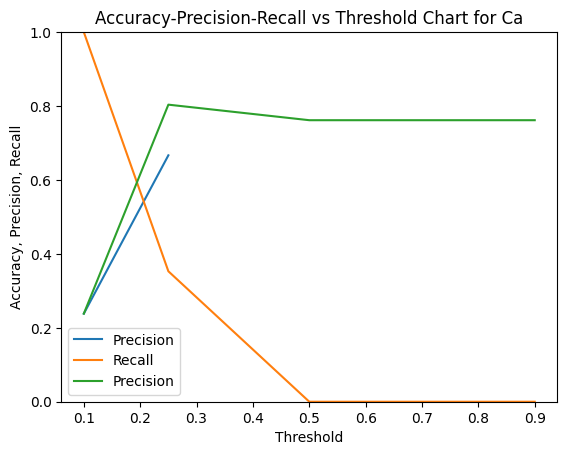

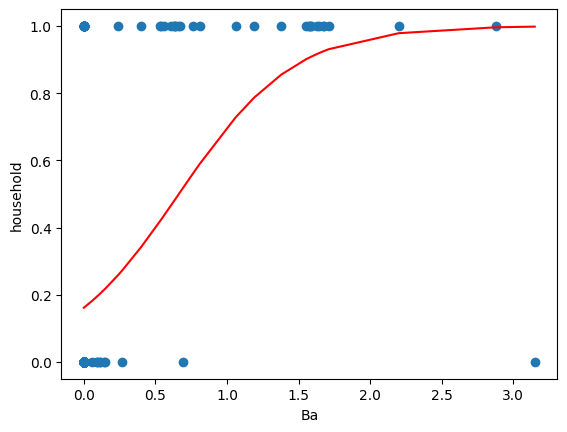

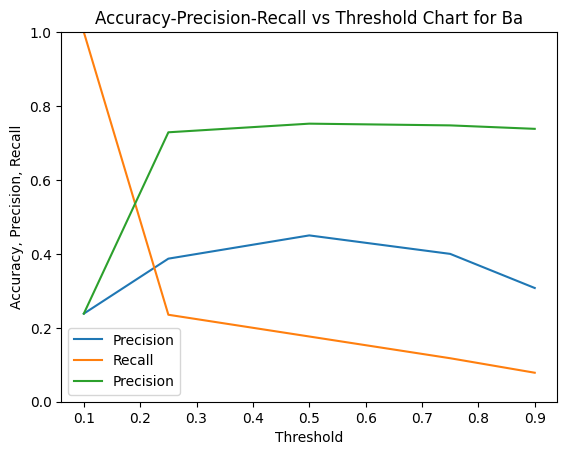

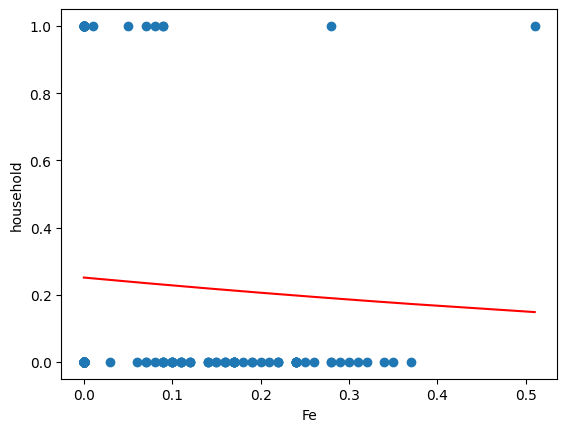

/var/folders/3r/gxtw2cvj59sdnn7pp03j5hrw0000gn/T/ipykernel_3994/796227465.py:40: RuntimeWarning: invalid value encountered in scalar divide
  Precision = (cm[1,1])/ (np.sum(cm[: , 1]))
/var/folders/3r/gxtw2cvj59sdnn7pp03j5hrw0000gn/T/ipykernel_3994/796227465.py:40: RuntimeWarning: invalid value encountered in scalar divide
  Precision = (cm[1,1])/ (np.sum(cm[: , 1]))
/var/folders/3r/gxtw2cvj59sdnn7pp03j5hrw0000gn/T/ipykernel_3994/796227465.py:40: RuntimeWarning: invalid value encountered in scalar divide
  Precision = (cm[1,1])/ (np.sum(cm[: , 1]))


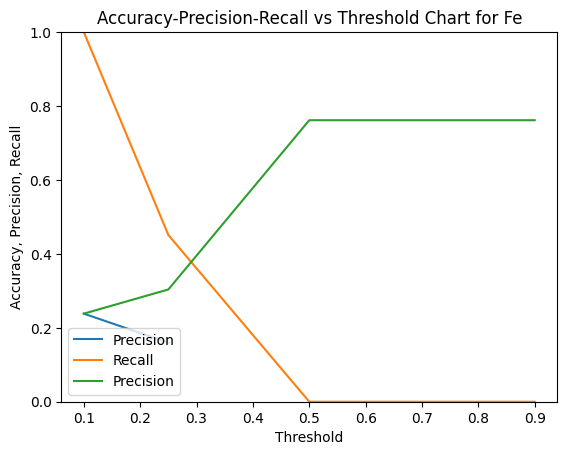

<Figure size 640x480 with 0 Axes>

In [28]:
#2. DO SAME ANALYSIS FOR ALL OTHER COLUMNS
for col in list(glass.columns):
    if len(col) == 2:
        #fit logistic regression model
        X= np.array(glass[col]).reshape(-1,1)
        y = glass.household

        logreg = LogisticRegression()
        logreg.fit(X,y)
        pred = logreg.predict(X)
        logreg.coef_, logreg.intercept_


        # Store the predicted probabilities of class 1.
        pred_col_name = "household_pred_prob" + col
        glass[pred_col_name] = logreg.predict_proba(X)[:, 1]

        glass.sort_values( by = col, inplace=True)

        # Plot the predicted probabilities.
        plt.scatter(glass[col], glass.household)
        plt.plot(glass[col], glass[pred_col_name], color='red')
        plt.xlabel(col)
        plt.ylabel('household')
        plt.show()
        plt.clf()


        thresholds = [0.1,0.25,0.5,0.75,0.9]
        accuracy = []
        precision = []
        recall = []
        for threshold in thresholds:
            y_predict_class = [1 if prob > threshold else 0 for prob in glass[pred_col_name]]

            cm = metrics.confusion_matrix(y_true=y, y_pred=y_predict_class)
            Accuracy = (cm[0,0]+ cm[1,1])/ (np.sum(cm))
            accuracy.append(Accuracy)

            Precision = (cm[1,1])/ (np.sum(cm[: , 1]))
            precision.append(Precision)

            Recall = (cm[1,1])/ (np.sum(cm[1,:]))
            recall.append(Recall)

        plt.title(f"Accuracy-Precision-Recall vs Threshold Chart for {col}")
        plt.plot(thresholds, precision, label="Precision")
        plt.plot(thresholds, recall, label="Recall")
        plt.plot(thresholds, accuracy, label="Precision")
        plt.ylabel("Accuracy, Precision, Recall")
        plt.xlabel("Threshold")
        plt.legend(loc="lower left")
        plt.ylim([0,1])
        plt.show()
        plt.clf()

Training Set Dimensions: (149, 19)
Validation Set Dimensions: (65, 19)


/Users/kura/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


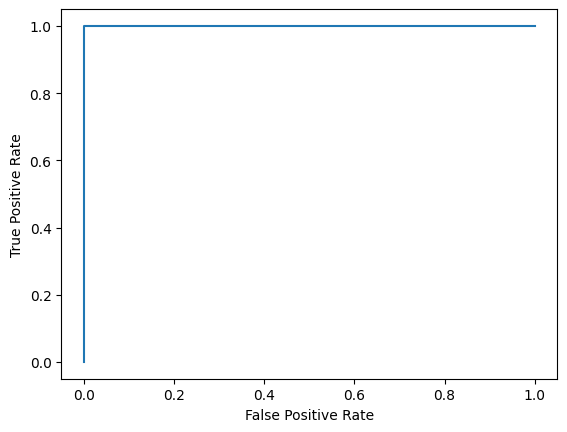

In [34]:
#3. Logistic Regression on all features
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

features = [col for col in list(glass.columns) if len(col) == 2]

#replace NANs in features with median value of the columns
for feature in features:
    glass.loc[glass[feature].isna(),feature] = glass[feature].median()

#standardize
scaler = StandardScaler()
scaler.fit_transform(glass[features])

#Train/Test Split
y = glass['household'] 
X = glass.drop(columns=['household']) #Validation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("Training Set Dimensions:", X_train.shape)
print("Validation Set Dimensions:", X_test.shape)

#Create and train log reg model
logreg = LogisticRegression()
logreg.fit(X,y)
pred = logreg.predict(X)

#plot ROC curve
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [36]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn import cluster, datasets, preprocessing, metrics
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

k == 2
k == 4
k == 6
k == 8
k == 10
k == 12
k == 14
k == 16
k == 18


/Users/kura/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kura/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kura/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kura/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` wi

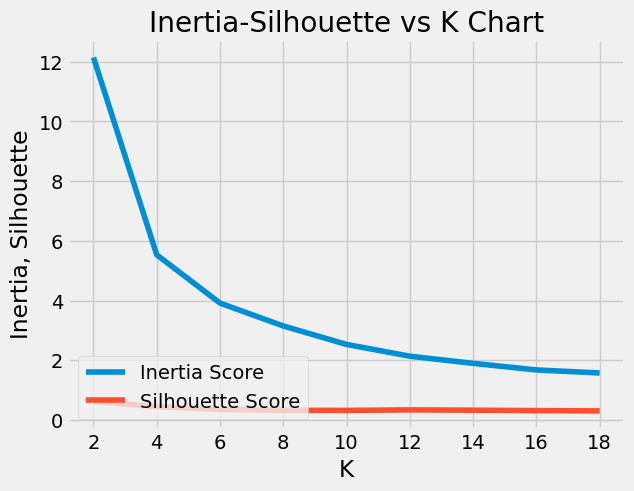

In [42]:
#Inertia and silhouette w/ different values of k
df = pd.read_csv("iris.csv")
cols = df.columns[:-1]
X_scaled = preprocessing.MinMaxScaler().fit_transform(df[cols])

k = []
inertia = []
sil = []
for val in range(2,20,2):
    print(f"k == {val}")
    k.append(val)

    kmeans = cluster.KMeans(n_clusters=val)
    kmeans.fit(X_scaled)

    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    inertia.append(kmeans.inertia_)

    sil_val = metrics.silhouette_score(X_scaled, labels, metric='euclidean')
    sil.append(sil_val)

plt.title(f"Inertia-Silhouette vs K Chart")
plt.plot(k, inertia, label="Inertia Score")
plt.plot(k, sil, label="Silhouette Score")
plt.ylabel("Inertia, Silhouette")
plt.xlabel("K")
plt.legend(loc="lower left")
plt.show()

k == 2
k == 4
k == 6
k == 8
k == 10
k == 12
k == 14
k == 16
k == 18


/Users/kura/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kura/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kura/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kura/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` wi

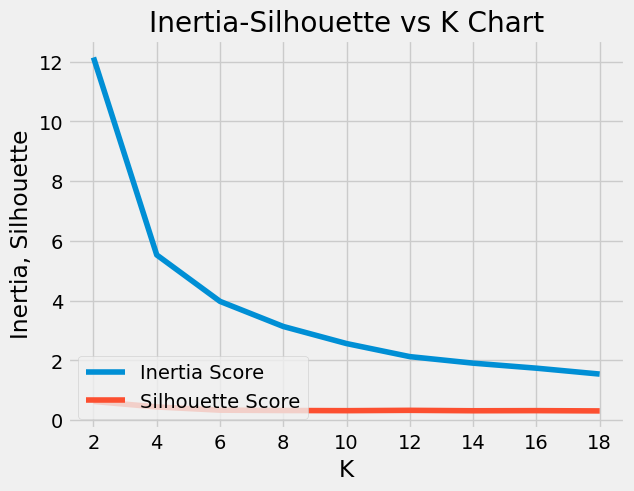

In [43]:
#Inertia and silhouette w/ different values of k AND no scaling
df = pd.read_csv("iris.csv")
cols = df.columns[:-1]

k = []
inertia = []
sil = []
for val in range(2,20,2):
    print(f"k == {val}")
    k.append(val)

    kmeans = cluster.KMeans(n_clusters=val)
    kmeans.fit(X_scaled)

    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    inertia.append(kmeans.inertia_)

    sil_val = metrics.silhouette_score(X_scaled, labels, metric='euclidean')
    sil.append(sil_val)

plt.title(f"Inertia-Silhouette vs K Chart")
plt.plot(k, inertia, label="Inertia Score")
plt.plot(k, sil, label="Silhouette Score")
plt.ylabel("Inertia, Silhouette")
plt.xlabel("K")
plt.legend(loc="lower left")
plt.show()

In [103]:
import re
with open('nutrients.txt', 'r') as in_file:
    lines = [line.strip().replace('"','') for line in in_file][1:-1]
    cols = ["Name","Energy","Protein","Fat","Calcium","Iron"]
    rows = []

    for line in lines:
        name = re.findall('([a-zA-Z ]*)\d*.*',line)[0].strip()
        nums = []
        for item in line.split():
            try:
                nums.append(float(item))
            except ValueError:
                pass

        row = [name] + nums
        rows.append(row)



nutrients = pd.DataFrame(rows,columns=cols)

k == 2
k == 4
k == 6
k == 8
k == 10
k == 12
k == 14
k == 16
k == 18


/Users/kura/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kura/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kura/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kura/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` wi

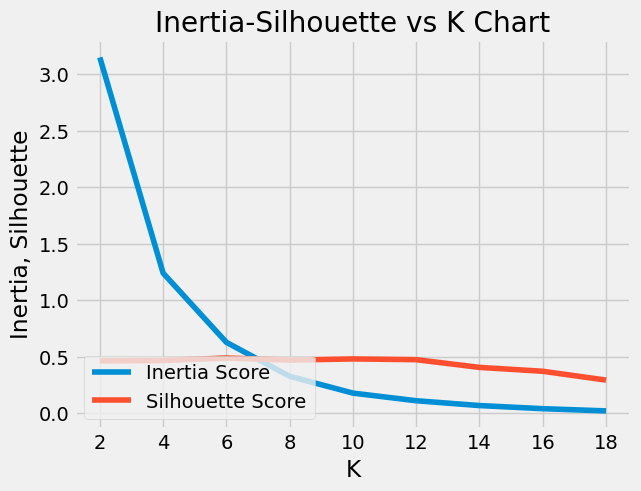

In [106]:
#Inertia and silhouette w/ different values of k
df = nutrients
cols = df.columns[1:-1]
X_scaled = preprocessing.MinMaxScaler().fit_transform(df[cols])

k = []
inertia = []
sil = []
for val in range(2,20,2):
    print(f"k == {val}")
    k.append(val)

    kmeans = cluster.KMeans(n_clusters=val)
    kmeans.fit(X_scaled)

    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    inertia.append(kmeans.inertia_)

    sil_val = metrics.silhouette_score(X_scaled, labels, metric='euclidean')
    sil.append(sil_val)

plt.title(f"Inertia-Silhouette vs K Chart")
plt.plot(k, inertia, label="Inertia Score")
plt.plot(k, sil, label="Silhouette Score")
plt.ylabel("Inertia, Silhouette")
plt.xlabel("K")
plt.legend(loc="lower left")
plt.show()